In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode

In [26]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_5a3d3a07167c4225bc28436d66060773 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6K1EjefXcLFmvl18t6IZkeYfH3GeT5JHIsZlP3gRPqau',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5a3d3a07167c4225bc28436d66060773.get_object(Bucket='diabetespatientreadmission-donotdelete-pr-se7kzhnzkvklsr',Key='pj-1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataoriginal= pd.read_csv(body)
dataoriginal



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
datacopy = dataoriginal.copy() 
Rep = datacopy.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck

encounter_id                    0
patient_nbr                     0
race                          355
gender                          0
age                             0
weight                      22212
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  22937
medical_specialty            9081
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          8
diag_2                        131
diag_3                        613
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)

In [5]:

datacopy['readmitted']

0         NO
1        >30
2         NO
3         NO
4         NO
5        >30
6         NO
7        >30
8         NO
9         NO
10       >30
11       <30
12       <30
13        NO
14       >30
15        NO
16       <30
17        NO
18       >30
19        NO
20        NO
21        NO
22        NO
23       >30
24        NO
25        NO
26        NO
27       >30
28       >30
29       >30
        ... 
22911     NO
22912     NO
22913    <30
22914     NO
22915     NO
22916     NO
22917     NO
22918     NO
22919     NO
22920    >30
22921    >30
22922     NO
22923    >30
22924     NO
22925    >30
22926    >30
22927    >30
22928     NO
22929     NO
22930     NO
22931    <30
22932     NO
22933     NO
22934     NO
22935     NO
22936    >30
22937     NO
22938     NO
22939     NO
22940    NaN
Name: readmitted, Length: 22941, dtype: object

In [6]:
datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)

In [7]:
datacopy.groupby('30readmit').size()

30readmit
0    12284
1    10657
dtype: int64

In [8]:
datacopy = datacopy[((datacopy.discharge_disposition_id != 11) & 
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) & 
                                          (datacopy.discharge_disposition_id != 19) & 
                                          (datacopy.discharge_disposition_id != 20) & 
                                          (datacopy.discharge_disposition_id != 21))]

In [9]:
numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [10]:
datacopy[numcolumn] = datacopy[numcolumn].fillna(0)
datacopy[objcolumn] = datacopy[objcolumn].fillna("unknown")

In [11]:
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
datacopy[listcol] = codemap(datacopy[listcol], codes)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [12]:
datacopy.describe

<bound method NDFrame.describe of        encounter_id  patient_nbr             race  gender       age  \
0           2278392      8222157        Caucasian  Female    [0-10)   
1            149190     55629189        Caucasian  Female   [10-20)   
2             64410     86047875  AfricanAmerican  Female   [20-30)   
3            500364     82442376        Caucasian    Male   [30-40)   
4             16680     42519267        Caucasian    Male   [40-50)   
5             35754     82637451        Caucasian    Male   [50-60)   
6             55842     84259809        Caucasian    Male   [60-70)   
7             63768    114882984        Caucasian    Male   [70-80)   
8             12522     48330783        Caucasian  Female   [80-90)   
9             15738     63555939        Caucasian  Female  [90-100)   
10            28236     89869032  AfricanAmerican  Female   [40-50)   
11            36900     77391171  AfricanAmerican    Male   [60-70)   
12            40926     85504905        Cau

In [13]:
data1 = datacopy.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [14]:
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,22513.000000,22513.000000,2.251300e+04,2.251300e+04,2.251300e+04,2.251300e+04,2.251300e+04,2.251300e+04,2.251300e+04,2.251300e+04,22513.000000
mean,5.622840,6.791232,-7.017539e-16,4.388816e-16,-2.519501e-15,1.207965e-16,1.536426e-16,-1.604389e-15,-8.917814e-15,-2.363262e-15,0.472927
std,7.213851,5.024499,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,0.499278
min,1.000000,1.000000,-1.184270e+00,-2.453767e+00,-8.194494e-01,-1.754323e+00,-2.048288e-01,-1.443495e-01,-5.043465e-01,-2.831803e+00,0.000000
25%,1.000000,2.000000,-8.649788e-01,-6.295043e-01,-8.194494e-01,-6.482904e-01,-2.048288e-01,-1.443495e-01,-5.043465e-01,-8.798312e-01,0.000000
50%,1.000000,7.000000,-2.263959e-01,3.386380e-02,-2.480303e-01,-1.567203e-01,-2.048288e-01,-1.443495e-01,-5.043465e-01,9.615499e-02,0.000000
75%,6.000000,7.000000,4.121871e-01,6.972319e-01,3.233887e-01,4.577423e-01,-2.048288e-01,-1.443495e-01,3.532330e-01,1.072141e+00,1.000000
max,25.000000,20.000000,2.966519e+00,4.622160e+00,2.609065e+00,5.865013e+00,2.865194e+01,5.569312e+01,1.235935e+01,1.072141e+00,1.000000


In [15]:
Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [17]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (18010, 164) (4503, 164)


In [18]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [19]:
Xtest


,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-rosiglitazone_No,metformin-rosiglitazone_unknown,metformin-pioglitazone_No,metformin-pioglitazone_unknown,change_Ch,change_No,change_unknown,diabetesMed_No,diabetesMed_Yes,diabetesMed_unknown
19562,1,7,-0.864979,-0.408382,-0.819449,-0.033828,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
18771,1,1,-0.226396,0.476109,0.894808,-0.156720,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
10094,6,17,0.092896,-1.513995,-0.819449,-0.279613,4.123687,-0.14435,2.068392,0.584148,...,1,0,1,0,1,0,0,0,1,0
20944,6,1,1.050770,0.641951,2.609065,0.703527,4.123687,-0.14435,3.783551,1.072141,...,1,0,1,0,0,1,0,0,1,0
18700,1,7,0.412187,0.033864,-0.819449,0.457742,-0.204829,-0.14435,-0.504347,-0.391838,...,1,0,1,0,1,0,0,0,1,0
1206,1,7,-0.545687,1.415881,0.323389,-0.894075,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
11814,18,4,2.966519,-0.187259,-0.248030,0.580635,-0.204829,-0.14435,0.353233,0.584148,...,1,0,1,0,0,1,0,1,0,0
3265,5,7,0.092896,-0.076698,-0.248030,-0.525398,-0.204829,-0.14435,1.210813,0.096155,...,1,0,1,0,0,1,0,0,1,0
16427,18,7,-1.184270,-1.182311,0.323389,-1.139861,-0.204829,-0.14435,-0.504347,0.584148,...,1,0,1,0,0,1,0,1,0,0
10106,1,7,-0.545687,1.028916,-0.248030,0.211957,-0.204829,-0.14435,2.068392,1.072141,...,1,0,1,0,1,0,0,0,1,0


In [20]:
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.606262491672


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[1738  635]
 [1138  992]]


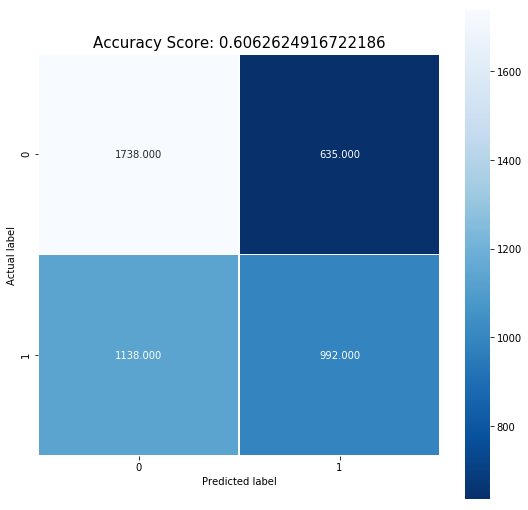

In [22]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credential = {
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "access_key": "Tp3KfHvSNhl4ThVBBVNaXL1P2JuKNe9FGgZpIWAbxM38",
    "username": "6adf792f-a33b-43a2-896f-f25daec8b857",
    "password": "21f1def1-383c-46e3-a254-bf1523ef0901",
    "instance_id": "d7eb8c7f-f193-4eaf-8474-ea243a7b6b69"
}
client = WatsonMachineLearningAPIClient(wml_credential)
model_drops= {client.repository.ModelMetaNames.AUTHOR_NAME: 'ibm',
             client.repository.ModelMetaNames.AUTHOR_EMAIL: 'hari@ibm.com',
             client.repository.ModelMetaNames.NAME: 'hari'}
model_artifact = client.repository.store_model(logisticreg,meta_props=model_drops)
published_model_uid = client.repository.get_model_uid(model_artifact)
created_deployment = client.deployments.create(published_model_uid, name = 'hari')
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

In [24]:
list(Xtest.columns.values)

['discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race_?',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'age_[0-10)',
 'age_[10-20)',
 'age_[20-30)',
 'age_[30-40)',
 'age_[40-50)',
 'age_[50-60)',
 'age_[60-70)',
 'age_[70-80)',
 'age_[80-90)',
 'age_[90-100)',
 'diag_1_blood',
 'diag_1_circulatory',
 'diag_1_congenital',
 'diag_1_digestive',
 'diag_1_endocrine',
 'diag_1_genitourinary',
 'diag_1_ill-defined',
 'diag_1_infections',
 'diag_1_injury',
 'diag_1_mental',
 'diag_1_musculoskeletal',
 'diag_1_neoplasms',
 'diag_1_nervous',
 'diag_1_pregnancy',
 'diag_1_respiratory',
 'diag_1_sense',
 'diag_1_skin',
 'diag_1_supplemental',
 'diag_1_unknown',
 'diag_2_blood',
 'diag_2_circulatory',
 'diag_2_congenital',
 'diag_2_digestive',
 '

In [25]:
Xtest

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin-rosiglitazone_No,metformin-rosiglitazone_unknown,metformin-pioglitazone_No,metformin-pioglitazone_unknown,change_Ch,change_No,change_unknown,diabetesMed_No,diabetesMed_Yes,diabetesMed_unknown
19562,1,7,-0.864979,-0.408382,-0.819449,-0.033828,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
18771,1,1,-0.226396,0.476109,0.894808,-0.156720,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
10094,6,17,0.092896,-1.513995,-0.819449,-0.279613,4.123687,-0.14435,2.068392,0.584148,...,1,0,1,0,1,0,0,0,1,0
20944,6,1,1.050770,0.641951,2.609065,0.703527,4.123687,-0.14435,3.783551,1.072141,...,1,0,1,0,0,1,0,0,1,0
18700,1,7,0.412187,0.033864,-0.819449,0.457742,-0.204829,-0.14435,-0.504347,-0.391838,...,1,0,1,0,1,0,0,0,1,0
1206,1,7,-0.545687,1.415881,0.323389,-0.894075,-0.204829,-0.14435,-0.504347,1.072141,...,1,0,1,0,0,1,0,0,1,0
11814,18,4,2.966519,-0.187259,-0.248030,0.580635,-0.204829,-0.14435,0.353233,0.584148,...,1,0,1,0,0,1,0,1,0,0
3265,5,7,0.092896,-0.076698,-0.248030,-0.525398,-0.204829,-0.14435,1.210813,0.096155,...,1,0,1,0,0,1,0,0,1,0
16427,18,7,-1.184270,-1.182311,0.323389,-1.139861,-0.204829,-0.14435,-0.504347,0.584148,...,1,0,1,0,0,1,0,1,0,0
10106,1,7,-0.545687,1.028916,-0.248030,0.211957,-0.204829,-0.14435,2.068392,1.072141,...,1,0,1,0,1,0,0,0,1,0
